In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ['sepal.length','sepal.width','petal.length','petal.width']
x=df.loc[:,features].values
y=df.loc[:,['class']].values

In [4]:
from sklearn.preprocessing import StandardScaler 

x=StandardScaler().fit_transform(x)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcomp=pca.fit_transform(x)
pdf = pd.DataFrame(data=pcomp,columns=['Principal Component 1','Principal Component 2'])
finaldf = pd.concat([pdf,df['class']],axis=1)
finaldf.head()

,Principal Component 1,Principal Component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


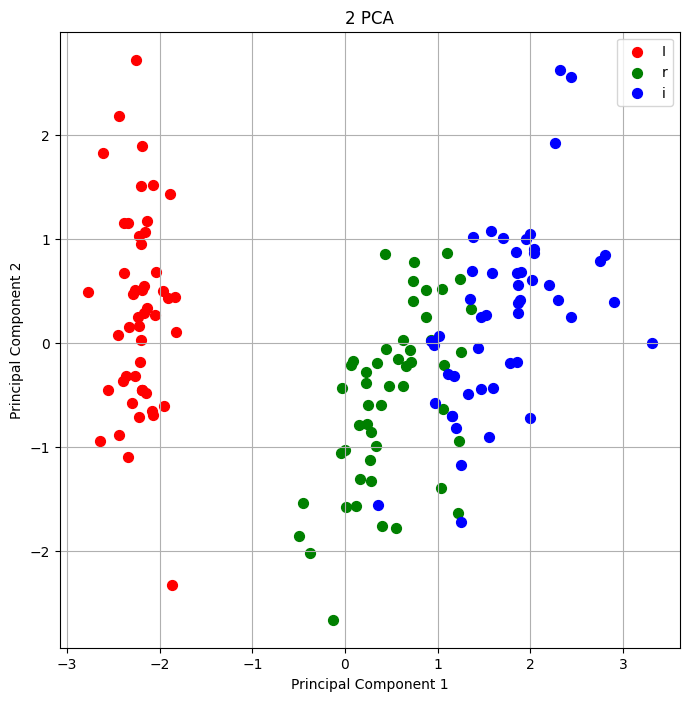

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 PCA')

variety = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']

for variety,color in zip(variety,colors):
    idtok = finaldf['class']==variety
    ax.scatter(finaldf.loc[idtok,'Principal Component 1'],finaldf.loc[idtok,'Principal Component 2'],c=color,s=50)

ax.legend(variety)
ax.grid()
